# Telecom X - An√°lisis de Evasi√≥n de Clientes


## Marco te√≥rico del proyecto

Has sido contratado como asistente de an√°lisis de datos en Telecom X y formar√°s parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes.

Tu desaf√≠o ser√° recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa. A partir de tu an√°lisis, el equipo de Data Science podr√° avanzar en modelos predictivos y desarrollar estrategias para reducir la evasi√≥n.

¬øQu√© se practica en este desaf√≠o?

1. Importaci√≥n y manipulaci√≥n datos desde una API de manera eficiente.
2. Aplicaci√≥n de los conceptos de ETL (Extracci√≥n, Transformaci√≥n y Carga) en la preparaci√≥n de los datos.
3. Creaci√≥n de visualizaciones estrat√©gicas para identificar patrones y tendencias.
4. Realizaci√≥n de un An√°lisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.

##üìå Extracci√≥n

Para iniciar el an√°lisis, se necesitar√° importar los datos de la API de Telecom X. Estos datos est√°n disponibles en formato JSON y contienen informaci√≥n esencial sobre los clientes, incluyendo datos demogr√°ficos, tipo de servicio contratado y estado de evasi√≥n.

¬øQu√© se debe de hacer para que se cumpla esta parte?

1. Cargar los datos directamente desde la API utilizando Python.
2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulaci√≥n.

In [1]:
import pandas as pd

In [2]:
url_datos = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [3]:
datos_telecom = pd.read_json(url_datos)
datos_telecom

customerID Churn                                           customer  \
0     0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1     0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2     0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3     0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4     0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
...          ...   ...                                                ...   
7262  9987-LUTYD    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7263  9992-RRAMN   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7264  9992-UJOEL    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7265  9993-LHIEB    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7266  9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                                  phone  \
0        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1       {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4        {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
...                                                 ...   
7262     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7263    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
7264     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7265     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7266  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                               internet  \
0     {'InternetService': 'DSL', 'OnlineSecurity': '...   
1     {'InternetService': 'DSL', 'OnlineSecurity': '...   
2     {'InternetService': 'Fiber optic', 'OnlineSecu...   
3     {'InternetService': 'Fiber optic', 'OnlineSecu...   
4     {'InternetService': 'Fiber optic', 'OnlineSecu...   
...                                                 ...   
7262  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7263  {'InternetService': 'Fiber optic', 'OnlineSecu...   
7264  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7265  {'InternetService': 'DSL', 'OnlineSecurity': '...   
7266  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                                account  
0     {'Contract': 'One year', 'PaperlessBilling': '...  
1     {'Contract': 'Month-to-month', 'PaperlessBilli...  
2     {'Contract': 'Month-to-month', 'PaperlessBilli...  
3     {'Contract': 'Month-to-month', 'PaperlessBilli...  
4     {'Contract': 'Month-to-month', 'PaperlessBilli...  
...                                                 ...  
7262  {'Contract': 'One year', 'PaperlessBilling': '...  
7263  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7264  {'Contract': 'Month-to-month', 'PaperlessBilli...  
7265  {'Contract': 'Two year', 'PaperlessBilling': '...  
7266  {'Contract': 'Two year', 'PaperlessBilling': '...  

[7267 rows x 6 columns]

In [4]:
df_customer = pd.json_normalize(datos_telecom['customer'])
df_phone = pd.json_normalize(datos_telecom['phone'])
df_internet = pd.json_normalize(datos_telecom['internet'])
df_account = pd.json_normalize(datos_telecom['account'])

datos_limpios = pd.concat([datos_telecom[['customerID','Churn']],df_customer, df_phone, df_internet, df_account], axis=1)
datos_limpios.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      Mailed check            65.6          593.3  
1               No      Mailed check            59.9          542.4  
2              Yes  Electronic check            73.9         280.85  
3              Yes  Electronic check            98.0        1237.85  
4              Yes      Mailed check            83.9          267.4  

[5 rows x 21 columns]

##üîß Transformaci√≥n


### Conocer contenido de columnas

Ahora que has extra√≠do los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudar√° a identificar qu√© variables son m√°s relevantes para el an√°lisis de evasi√≥n de clientes.

üìå Para facilitar este proceso, hemos creado un diccionario de datos con la descripci√≥n de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la informaci√≥n disponible.

¬øQu√© debes hacer?
1. Explorar las columnas del dataset y verificar sus tipos de datos.
2. Consultar el diccionario para comprender mejor el significado de las variables.
3. Identificar las columnas m√°s relevantes para el an√°lisis de evasi√≥n.

In [5]:
columnas_numericas = [
    'Churn', 'gender', 'SeniorCitizen','Partner', 'Dependents',
    'PhoneService','InternetService', 'MultipleLines', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'PaymentMethod', 'Contract','OnlineSecurity']

In [6]:
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
InternetService: ['DSL' 'Fiber optic' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Contract: ['One year' 'Month-to-month' 'Two year']
OnlineSecurity: ['No' 'Yes' 'No internet service']


### Comprobaci√≥n de incoherencias en los datos
En este paso, verifica si hay problemas en los datos que puedan afectar el an√°lisis. Presta atenci√≥n a valores ausentes, duplicados, errores de formato e inconsistencias en las categor√≠as. Este proceso es esencial para asegurarte de que los datos est√©n listos para las siguientes etapas.



In [7]:
import numpy as np

In [8]:
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].str.replace(' ', '', regex=True)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].replace('', np.nan)
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].astype(float)
datos_limpios['Charges.Total'].isnull().sum()

np.int64(11)

In [9]:
datos_limpios['Charges.Total'] = datos_limpios['Charges.Total'].fillna(0)
datos_limpios['Charges.Total'].isnull().sum()

np.int64(0)

In [10]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Manejo de inconsistencias:

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que est√©n completos y coherentes, prepar√°ndolos para las siguientes etapas del an√°lisis..

In [11]:
datos_limpios = datos_limpios.query("Churn != ''")
datos_limpios = datos_limpios
datos_limpios['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'Contract', 'PaymentMethod']].apply(lambda col: col.str.lower())
datos_limpios.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-orfbo    No  female              0     Yes        Yes       9   
1  0003-mknfe    No    male              0      No         No       9   
2  0004-tlhlj   Yes    male              0      No         No       4   
3  0011-igkff   Yes    male              1     Yes         No      13   
4  0013-exchz   Yes  female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             dsl  ...          Yes   
1          Yes           Yes             dsl  ...           No   
2          Yes            No     fiber optic  ...           No   
3          Yes            No     fiber optic  ...          Yes   
4          Yes            No     fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        one year   
1               No          No          No             Yes  month-to-month   
2              Yes          No          No              No  month-to-month   
3              Yes          No         Yes             Yes  month-to-month   
4               No         Yes         Yes              No  month-to-month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      mailed check            65.6         593.30  
1               No      mailed check            59.9         542.40  
2              Yes  electronic check            73.9         280.85  
3              Yes  electronic check            98.0        1237.85  
4              Yes      mailed check            83.9         267.40  

[5 rows x 21 columns]

In [13]:
datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))
datos_limpios['Contract'] = datos_limpios['Contract'].apply(lambda x: x.replace('-',' '))
datos_limpios.head()

<ipython-input-13-e6f06bd8b4c2>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']] = datos_limpios[['customerID','gender', 'InternetService', 'PaymentMethod']].applymap(lambda x: x.replace('-','').replace(',',''.strip()))


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002orfbo    No  female              0     Yes        Yes       9   
1  0003mknfe    No    male              0      No         No       9   
2  0004tlhlj   Yes    male              0      No         No       4   
3  0011igkff   Yes    male              1     Yes         No      13   
4  0013exchz   Yes  female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             dsl  ...          Yes   
1          Yes           Yes             dsl  ...           No   
2          Yes            No     fiber optic  ...           No   
3          Yes            No     fiber optic  ...          Yes   
4          Yes            No     fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        one year   
1               No          No          No             Yes  month to month   
2              Yes          No          No              No  month to month   
3              Yes          No         Yes             Yes  month to month   
4               No         Yes         Yes              No  month to month   

  PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0              Yes      mailed check            65.6         593.30  
1               No      mailed check            59.9         542.40  
2              Yes  electronic check            73.9         280.85  
3              Yes  electronic check            98.0        1237.85  
4              Yes      mailed check            83.9         267.40  

[5 rows x 21 columns]

In [14]:
datos_limpios['gender'] = datos_limpios['gender'].map({'male': 0, 'female': 1})
datos_limpios['InternetService'] = datos_limpios['InternetService'].map({'no': 0, 'dsl': 1, 'fiber optic': 2})
datos_limpios['Contract'] = datos_limpios['Contract'].map({'month to month': 0, 'one year': 1, 'two year': 2})

In [15]:
columnas_binarias = ['Churn','Partner','Dependents','PhoneService','PaperlessBilling']

datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes':1, 'No':0})

<ipython-input-15-fdaddcc84ca7>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_limpios[columnas_binarias] = datos_limpios[columnas_binarias].replace({'Yes':1, 'No':0})


In [16]:
mapeo_servicios = {
    'No': 0,
    'Yes': 1,
    'No internet service': 0,
    'No phone service': 0
}
columnas_servicios = ['MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','OnlineSecurity']

for columna in columnas_servicios:
    datos_limpios[columna] = datos_limpios[columna].map(mapeo_servicios)

In [17]:
datos_limpios.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002orfbo      0       1              0        1           1       9   
1  0003mknfe      0       0              0        0           0       9   
2  0004tlhlj      1       0              0        0           0       4   
3  0011igkff      1       0              1        1           0      13   
4  0013exchz      1       1              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  OnlineBackup  \
0             1              0                1  ...             1   
1             1              1                1  ...             0   
2             1              0                2  ...             0   
3             1              0                2  ...             1   
4             1              0                2  ...             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            1            1                0         1   
1                 0            0            0                1         0   
2                 1            0            0                0         0   
3                 1            0            1                1         0   
4                 0            1            1                0         0   

   PaperlessBilling     PaymentMethod Charges.Monthly  Charges.Total  
0                 1      mailed check            65.6         593.30  
1                 0      mailed check            59.9         542.40  
2                 1  electronic check            73.9         280.85  
3                 1  electronic check            98.0        1237.85  
4                 1      mailed check            83.9         267.40  

[5 rows x 21 columns]

In [19]:
for columna in columnas_numericas:
    print(f"{columna}: {datos_limpios[columna].unique()}")

Churn: [0 1]
gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [1 0]
PhoneService: [1 0]
InternetService: [1 2 0]
MultipleLines: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [1 0]
StreamingTV: [1 0]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Contract: [1 0 2]
OnlineSecurity: [0 1]


### Creacion de cuentas diarias

Ahora que los datos est√°n limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturaci√≥n mensual para calcular el valor diario, proporcionando una visi√≥n m√°s detallada del comportamiento de los clientes a lo largo del tiempo.

üìå Esta columna te ayudar√° a profundizar en el an√°lisis y a obtener informaci√≥n valiosa para las siguientes etapas.

In [20]:
datos_limpios['Cuentas_Diarias'] = datos_limpios['Charges.Monthly'] / 30

In [21]:
datos_limpios.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002orfbo      0       1              0        1           1       9   
1  0003mknfe      0       0              0        0           0       9   
2  0004tlhlj      1       0              0        0           0       4   
3  0011igkff      1       0              1        1           0      13   
4  0013exchz      1       1              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  DeviceProtection  \
0             1              0                1  ...                 0   
1             1              1                1  ...                 0   
2             1              0                2  ...                 1   
3             1              0                2  ...                 1   
4             1              0                2  ...                 0   

   TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0            1            1                0         1                 1   
1            0            0                1         0                 0   
2            0            0                0         0                 1   
3            0            1                1         0                 1   
4            1            1                0         0                 1   

      PaymentMethod  Charges.Monthly Charges.Total  Cuentas_Diarias  
0      mailed check             65.6        593.30         2.186667  
1      mailed check             59.9        542.40         1.996667  
2  electronic check             73.9        280.85         2.463333  
3  electronic check             98.0       1237.85         3.266667  
4      mailed check             83.9        267.40         2.796667  

[5 rows x 22 columns]

### Estandarizaci√≥n y transformaci√≥n de datos (opcional)

La estandarizaci√≥n y transformaci√≥n de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la informaci√≥n sea m√°s consistente, comprensible y adecuada para el an√°lisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "S√≠" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matem√°tico y la aplicaci√≥n de modelos anal√≠ticos.

Adem√°s, traducir o renombrar columnas y datos hace que la informaci√≥n sea m√°s accesible y f√°cil de entender, especialmente cuando se trabaja con fuentes externas o t√©rminos t√©cnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicaci√≥n de los resultados, facilitando la interpretaci√≥n y evitando confusiones, especialmente al compartir informaci√≥n con stakeholders no t√©cnicos.

In [22]:
datos_limpios = pd.get_dummies(datos_limpios, columns=['PaymentMethod'])
datos_limpios.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002orfbo      0       1              0        1           1       9   
1  0003mknfe      0       0              0        0           0       9   
2  0004tlhlj      1       0              0        0           0       4   
3  0011igkff      1       0              1        1           0      13   
4  0013exchz      1       1              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  StreamingMovies  \
0             1              0                1  ...                0   
1             1              1                1  ...                1   
2             1              0                2  ...                0   
3             1              0                2  ...                1   
4             1              0                2  ...                0   

   Contract  PaperlessBilling  Charges.Monthly  Charges.Total  \
0         1                 1             65.6         593.30   
1         0                 0             59.9         542.40   
2         0                 1             73.9         280.85   
3         0                 1             98.0        1237.85   
4         0                 1             83.9         267.40   

   Cuentas_Diarias  PaymentMethod_bank transfer (automatic)  \
0         2.186667                                    False   
1         1.996667                                    False   
2         2.463333                                    False   
3         3.266667                                    False   
4         2.796667                                    False   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_mailed check  
0                        True  
1                        True  
2                       False  
3                       False  
4                        True  

[5 rows x 25 columns]

In [23]:
datos_limpios[['PaymentMethod_mailed check',
    'PaymentMethod_bank transfer (automatic)',
      'PaymentMethod_credit card (automatic)',
      'PaymentMethod_electronic check']].sum()

PaymentMethod_mailed check                 1612
PaymentMethod_bank transfer (automatic)    1544
PaymentMethod_credit card (automatic)      1522
PaymentMethod_electronic check             2365
dtype: int64

In [24]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [25]:
servicios = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'StreamingMovies',
             'OnlineBackup', 'DeviceProtection', 'PhoneService', 'MultipleLines']


datos_limpios['ServiciosContratados'] = datos_limpios[servicios].sum(axis=1)
datos_limpios.head()

customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002orfbo      0       1              0        1           1       9   
1  0003mknfe      0       0              0        0           0       9   
2  0004tlhlj      1       0              0        0           0       4   
3  0011igkff      1       0              1        1           0      13   
4  0013exchz      1       1              1        1           0       3   

   PhoneService  MultipleLines  InternetService  ...  Contract  \
0             1              0                1  ...         1   
1             1              1                1  ...         0   
2             1              0                2  ...         0   
3             1              0                2  ...         0   
4             1              0                2  ...         0   

   PaperlessBilling  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0                 1             65.6         593.30         2.186667   
1                 0             59.9         542.40         1.996667   
2                 1             73.9         280.85         2.463333   
3                 1             98.0        1237.85         3.266667   
4                 1             83.9         267.40         2.796667   

   PaymentMethod_bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

   PaymentMethod_credit card (automatic)  PaymentMethod_electronic check  \
0                                  False                           False   
1                                  False                           False   
2                                  False                            True   
3                                  False                            True   
4                                  False                           False   

   PaymentMethod_mailed check  ServiciosContratados  
0                        True                     4  
1                        True                     3  
2                       False                     2  
3                       False                     5  
4                        True                     3  

[5 rows x 26 columns]

In [26]:
datos_limpios['ServiciosContratados'].sample(20)

2415    1
2579    1
5337    6
5949    3
6941    2
2012    1
3919    3
7213    4
3003    2
3286    2
240     3
4556    2
5181    1
3236    4
2016    5
3911    4
6465    3
3896    6
4378    8
6860    4
Name: ServiciosContratados, dtype: int64

#üìä Carga y an√°lisis

### An√°lisis Descriptivo

Para comenzar, realiza un an√°lisis descriptivo de los datos, calculando m√©tricas como media, mediana, desviaci√≥n est√°ndar y otras medidas que ayuden a comprender mejor la distribuci√≥n y el comportamiento de los clientes.

üìå Consejos:

üîó Documentaci√≥n de DataFrame.describe()

In [27]:
datos_limpios.describe()

Churn       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean      0.265370     0.495244       0.162147     0.483033     0.299588   
std       0.441561     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000     0.000000       0.000000     0.000000     0.000000   
75%       1.000000     1.000000       0.000000     1.000000     1.000000   
max       1.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.421837         1.222916   
std      24.559481      0.295752       0.493888         0.778877   
min       0.000000      0.000000       0.000000         0.000000   
25%       9.000000      1.000000       0.000000         1.000000   
50%      29.000000      1.000000       0.000000         1.000000   
75%      55.000000      1.000000       1.000000         2.000000   
max      72.000000      1.000000       1.000000         2.000000   

       OnlineSecurity  ...  DeviceProtection  TechSupport  StreamingTV  \
count     7043.000000  ...       7043.000000  7043.000000  7043.000000   
mean         0.286668  ...          0.343888     0.290217     0.384353   
std          0.452237  ...          0.475038     0.453895     0.486477   
min          0.000000  ...          0.000000     0.000000     0.000000   
25%          0.000000  ...          0.000000     0.000000     0.000000   
50%          0.000000  ...          0.000000     0.000000     0.000000   
75%          1.000000  ...          1.000000     1.000000     1.000000   
max          1.000000  ...          1.000000     1.000000     1.000000   

       StreamingMovies     Contract  PaperlessBilling  Charges.Monthly  \
count      7043.000000  7043.000000       7043.000000      7043.000000   
mean          0.387903     0.690473          0.592219        64.761692   
std           0.487307     0.833755          0.491457        30.090047   
min           0.000000     0.000000          0.000000        18.250000   
25%           0.000000     0.000000          0.000000        35.500000   
50%           0.000000     0.000000          1.000000        70.350000   
75%           1.000000     1.000000          1.000000        89.850000   
max           1.000000     2.000000          1.000000       118.750000   

       Charges.Total  Cuentas_Diarias  ServiciosContratados  
count    7043.000000      7043.000000           7043.000000  
mean     2279.734304         2.158723              3.362914  
std      2266.794470         1.003002              2.062031  
min         0.000000         0.608333              0.000000  
25%       398.550000         1.183333              1.000000  
50%      1394.550000         2.345000              3.000000  
75%      3786.600000         2.995000              5.000000  
max      8684.800000         3.958333              8.000000  

[8 rows x 21 columns]

### Distribuci√≥n de evasi√≥n (Clientes que cancelaron vs no)

En este paso, el objetivo es comprender c√≥mo est√° distribuida la variable "churn" (evasi√≥n) entre los clientes. Utiliza gr√°ficos para visualizar la proporci√≥n de clientes que permanecieron y los que se dieron de baja.

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
conteo = datos_limpios['Churn'].value_counts().rename(index={0: 'No cancelaron', 1: 'Cancelaron'})

fig, ax = plt.subplots(figsize=(10,5))
conteo.plot(kind='barh', ax=ax, color=['purple','orchid'])
plt.title('Cantidad de clientes que cancelaron')
ax.set_xlabel('Cantidad')
ax.set_ylabel(' ')

# Mostrar los n√∫meros al lado de cada barra
for i, (valor) in enumerate(conteo):
    ax.text(valor + 5, i, str(valor), color='black', fontsize=10, va='center')

fig.savefig('distribucion_cancelacion.png',transparent=False,dpi=300,bbox_inches='tight')

plt.show()

### Evasi√≥n de clientes seg√∫n Genero, Servicio de Internet, Tipo de contrato

Ahora, exploraremos c√≥mo se distribuye la evasi√≥n seg√∫n variables categ√≥ricas, como g√©nero, tipo de contrato, m√©todo de pago, entre otras.

Este an√°lisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudar√° a orientar acciones estrat√©gicas.

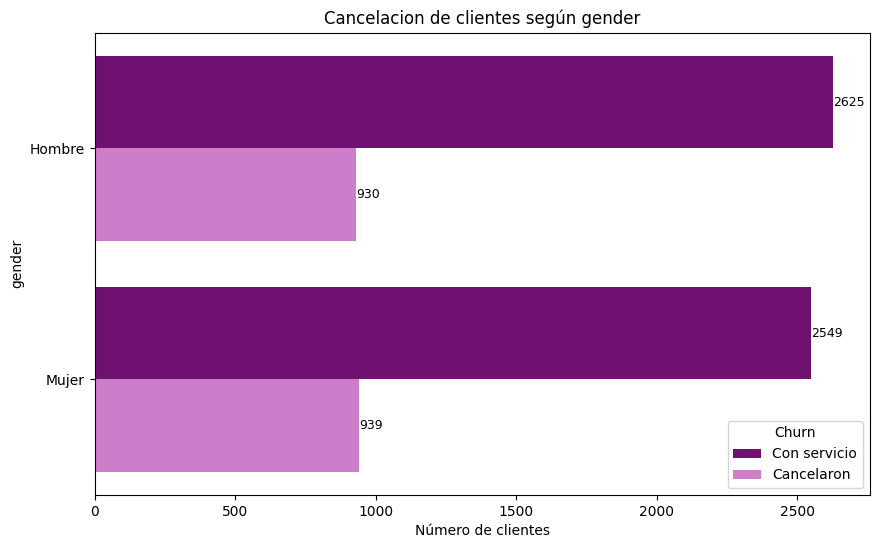


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------




------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



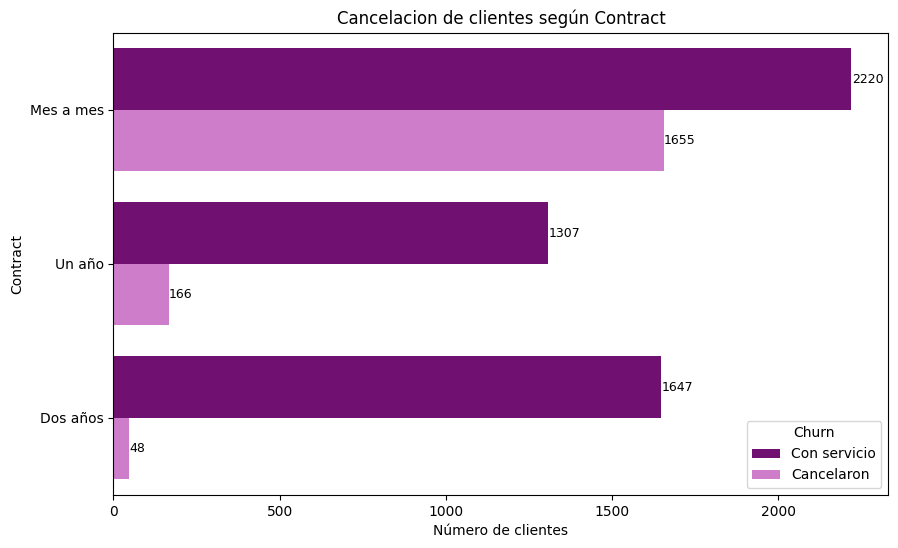


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [30]:
def plot_churn_by_category(column, labels_dict=None):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(data=datos_limpios, y=column, hue='Churn', ax=ax, palette=['purple','orchid'])
    ax.set_title(f'Cancelacion de clientes seg√∫n {column}')
    ax.set_xlabel('N√∫mero de clientes')
    ax.set_ylabel(column)
    ax.legend(title='Churn', labels=['Con servicio', 'Cancelaron'])

    if labels_dict:
        unique_vals = sorted(datos_limpios[column].unique())
        ax.set_yticks(unique_vals)
        ax.set_yticklabels([labels_dict[val] for val in unique_vals])

    for a in ax.patches:
      width = a.get_width()
      if width > 0:
          ax.text(width + 1, a.get_y() + a.get_height() / 2, int(width), va='center', fontsize=9, color='black')
    fig.savefig(f'{column}.png',transparent=False,dpi=300,bbox_inches='tight')
    plt.show()
    print('\n' + '-'*180 + '\n')

labels_gender = {0: 'Hombre', 1: 'Mujer'}
labels_internet = {0: 'Sin Internet', 1: 'DSL', 2: 'Fibra √ìptica'}
labels_contract = {0: 'Mes a mes', 1: 'Un a√±o', 2: 'Dos a√±os'}

plot_churn_by_category('gender', labels_gender)
plot_churn_by_category('InternetService', labels_internet)
plot_churn_by_category('Contract', labels_contract)

### Cantidad de clientes que cancelaron por m√©todo de pago


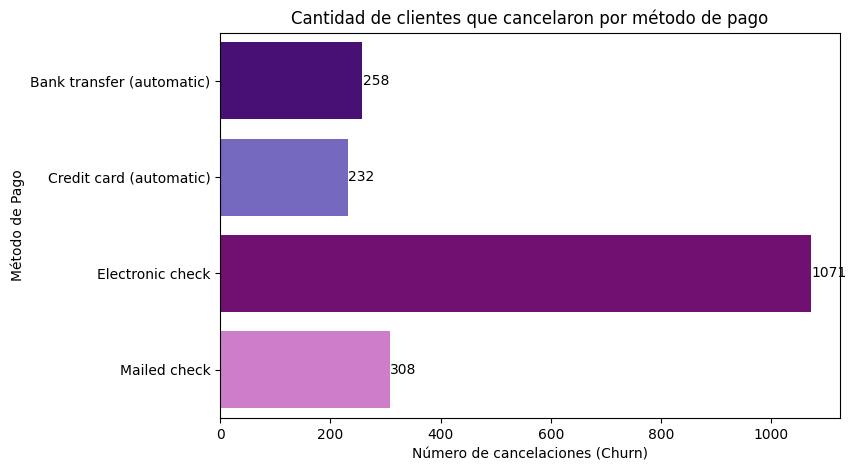

In [33]:
payment_churn = {
    'Bank transfer (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_bank transfer (automatic)'].sum(),
    'Credit card (automatic)': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_credit card (automatic)'].sum(),
    'Electronic check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_electronic check'].sum(),
    'Mailed check': datos_limpios.loc[datos_limpios['Churn']==1, 'PaymentMethod_mailed check'].sum()
}
df_churn = pd.DataFrame(payment_churn.items(), columns=['M√©todo', 'Cancelaciones'])

plt.figure(figsize=(8,5))
sns.barplot(
    x='Cancelaciones',
    y='M√©todo',
    hue='M√©todo',
    data=df_churn,
    orient='h',
    palette=['indigo','slateblue','purple','orchid'],
    legend=False
)

for i, v in enumerate(df_churn['Cancelaciones']):
    plt.text(v+1, i, int(v), va='center')

plt.title('Cantidad de clientes que cancelaron por m√©todo de pago')
plt.xlabel('N√∫mero de cancelaciones (Churn)')
plt.ylabel('M√©todo de Pago')

fig = plt.gcf()
fig.savefig('cancelaciones_por_metodo.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Conteo de evasi√≥n por variables num√©ricas

En este paso, explora c√≥mo las variables num√©ricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasi√≥n) y los que no cancelaron.

Este an√°lisis ayuda a entender si ciertos valores num√©ricos est√°n m√°s asociados con la evasi√≥n, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

#### Distribuci√≥n de Cargos Totales por Cancelaci√≥n

In [33]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Cancel√≥', 1: 'Cancel√≥'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Charges.Total', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Cancel√≥':'blue', 'Cancel√≥':'red'}, bins=30)

ax.set_title('Distribuci√≥n de Cargos Totales por Cancelaci√≥n', fontsize=14)
ax.set_xlabel('Cargos Totales', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_cargos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Distribuci√≥n de meses por Cancelaci√≥n

In [34]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Cancel√≥', 1: 'Cancel√≥'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='tenure', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Cancel√≥':'blue', 'Cancel√≥':'red'}, bins=30)

ax.set_title('Distribuci√≥n de meses por Cancelaci√≥n', fontsize=14)
ax.set_xlabel('Duracion del contrato (meses)', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_por_meses.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Distribuci√≥n de dias por Cancelaci√≥n

In [35]:
datos_limpios['Cancelacion'] = datos_limpios['Churn'].map({0: 'No Cancel√≥', 1: 'Cancel√≥'})

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=datos_limpios, x='Cuentas_Diarias', hue='Cancelacion', kde=True, element="step", ax=ax, palette={'No Cancel√≥':'blue', 'Cancel√≥':'red'}, bins=30)

ax.set_title('Distribuci√≥n por Gastos Diarios por Cancelaci√≥n', fontsize=14)
ax.set_xlabel('Gastos Diarios del cliente', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)
fig.savefig('cancelacion_porDias_gastos.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Relacion de servicio de internet y Tipo de contrato

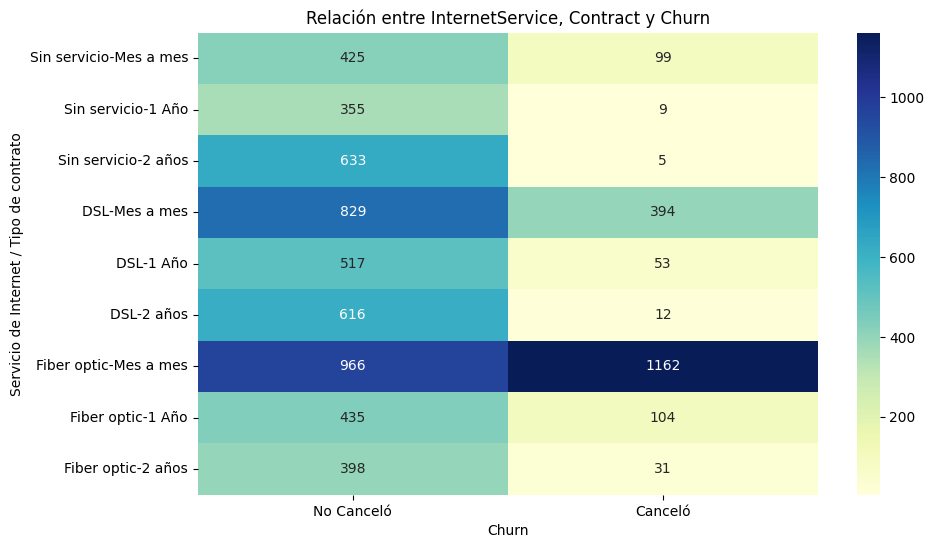

In [36]:
internet_labels = {0: 'Sin servicio', 1: 'DSL', 2: 'Fiber optic'}
contract_labels = {0: 'Mes a mes', 1: '1 A√±o', 2: '2 a√±os'}
churn_labels = {0:'No Cancel√≥', 1: 'Cancel√≥'}

tabla = pd.crosstab(
    [datos_limpios['InternetService'], datos_limpios['Contract']],
    datos_limpios['Churn']
)

tabla.index = pd.MultiIndex.from_tuples(
    [(internet_labels[i], contract_labels[c]) for i, c in tabla.index],
    names=['InternetService', 'Contract']
)

tabla.rename(columns=churn_labels, inplace=True)

plt.figure(figsize=(10,6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relaci√≥n entre InternetService, Contract y Churn')
plt.ylabel('Servicio de Internet / Tipo de contrato')
plt.xlabel('Churn')
plt.savefig('relacion_internet_contract_churn.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

### Relaci√≥n entre n√∫mero de "servicios contratados" y "cancelaci√≥n"

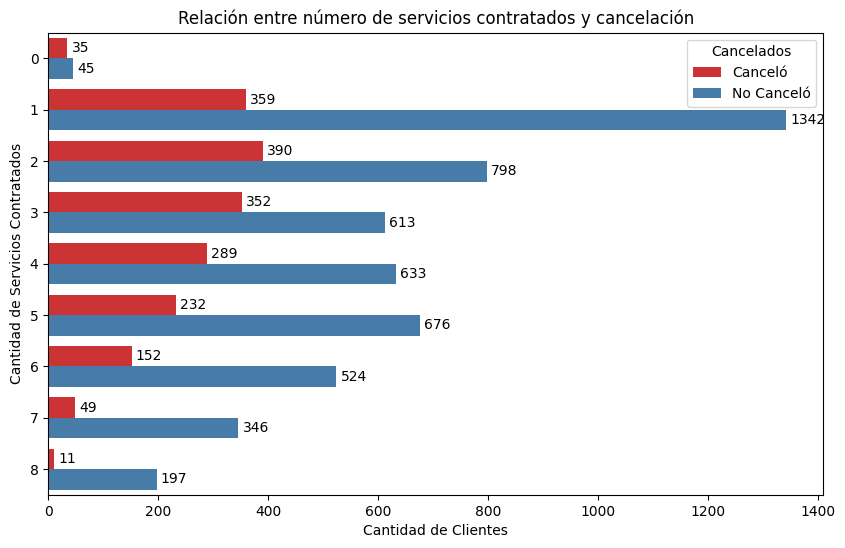

In [37]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=datos_limpios, y='ServiciosContratados', hue='Cancelacion', palette='Set1')

plt.title('Relaci√≥n entre n√∫mero de servicios contratados y cancelaci√≥n')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad de Servicios Contratados')
plt.legend(title='Cancelados')

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='edge', padding=3)
plt.savefig('servicios_contratados_cancelados.png',transparent=False,dpi=300,bbox_inches='tight')
plt.show()

#üìÑInforme final

### Introducci√≥n
La empresa Telecom X enfrenta una alta tasa de cancelaciones de clientes, lo que impacta sus ingresos y estabilidad en el mercado. Este an√°lisis tiene como objetivo comprender los factores que influyen en la evasi√≥n (Churn), identificando patrones y tendencias en los datos hist√≥ricos de clientes. A trav√©s de un proceso de limpieza, transformaci√≥n y exploraci√≥n, buscamos obtener insights clave para reducir la cancelaci√≥n y mejorar la retenci√≥n.

### Limpieza y Tratamiento de Datos
Para garantizar la calidad de los datos y facilitar el an√°lisis, se realizaron los siguientes pasos:

- Extracci√≥n: Se obtuvieron los datos desde la API de Telecom X en formato JSON y se transformaron en un DataFrame.

- Transformaci√≥n: Se limpiaron inconsistencias, eliminando espacios en blanco, normalizando texto y convirtiendo valores categ√≥ricos en formato num√©rico.

- Estandarizaci√≥n: Se renombraron columnas y se estructuraron variables binarias (S√≠ y No ‚Üí 1 y 0) para mejorar el procesamiento.

Ejemplo de conversi√≥n de datos:

`datos_limpios['EstadoCancelacion'] = datos_limpios['Churn'].replace({'Yes': 1, 'No': 0})`

### An√°lisis Exploratorio de Datos
El an√°lisis exploratorio nos permiti√≥ comprender mejor el comportamiento de los clientes. Se visualizaron m√©tricas clave como:

- Distribuci√≥n de Evasi√≥n: Se analiz√≥ la proporci√≥n de clientes que cancelaron vs. los que permanecieron.

- Evasi√≥n seg√∫n caracter√≠sticas: Se explor√≥ el impacto del g√©nero, tipo de contrato y m√©todo de pago en la cancelaci√≥n.

- Tendencias num√©ricas: Se analiz√≥ la relaci√≥n entre cantidad gastada, duraci√≥n del contrato y la evasi√≥n.

Ejemplo de distribuci√≥n de cancelaciones:

conteo = datos_limpios['EstadoCancelacion'].value_counts()
conteo.plot(kind='bar', color=['blue', 'red'])
plt.title('Clientes que cancelaron vs. no cancelaron')
plt.show()

```
# Tiene formato de c√≥digo
```

### Conclusiones e Insights
A partir del an√°lisis, se identificaron varios hallazgos clave:

- Los clientes con contratos mensuales tienen mayor tendencia a cancelar.

- Los usuarios con servicios de Fibra √ìptica presentan una menor tasa de cancelaci√≥n en comparaci√≥n con DSL.

- Los m√©todos de pago Electronic Check tienen mayor evasi√≥n que tarjetas de cr√©dito o transferencias autom√°ticas.

Estos insights pueden ayudar a la empresa a ajustar estrategias de retenci√≥n, focaliz√°ndose en segmentos espec√≠ficos.

### Recomendaciones
Con base en los datos obtenidos, se sugieren las siguientes estrategias para reducir la evasi√≥n:
- Implementar descuentos o beneficios para clientes con contratos mensuales, incentivando su fidelizaci√≥n.
- Mejorar el servicio en DSL para equiparar la satisfacci√≥n con Fibra √ìptica.
- Ofrecer incentivos a los clientes que utilizan Electronic Check para que migren a m√©todos de pago m√°s estables.
- Realizar campa√±as personalizadas seg√∫n el perfil de clientes con mayor probabilidad de cancelaci√≥n.




### ¬°Extra! An√°lisis de correlaci√≥n entre variables

Como un paso adicional, puedes explorar la correlaci√≥n entre diferentes variables del dataset. Esto puede ayudar a identificar qu√© factores tienen mayor relaci√≥n con la evasi√≥n de clientes, como:
- La relaci√≥n entre la cuenta diaria y la evasi√≥n.
- C√≥mo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la funci√≥n corr() de Pandas para calcular las correlaciones y visualizar los resultados con gr√°ficos de dispersi√≥n o matrices de correlaci√≥n.

Este an√°lisis adicional puede proporcionar insights valiosos para la creaci√≥n de modelos predictivos m√°s robustos. üöÄ

In [39]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   Churn                                    7043 non-null   int64  
 2   gender                                   7043 non-null   int64  
 3   SeniorCitizen                            7043 non-null   int64  
 4   Partner                                  7043 non-null   int64  
 5   Dependents                               7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   MultipleLines                            7043 non-null   int64  
 9   InternetService                          7043 non-null   int64  
 10  OnlineSecurity                           7043 non-nul

In [41]:
datos_limpios["Cancelacion"] = datos_limpios["Cancelacion"].map({"No Cancel√≥": 0, "Cancel√≥": 1})
print(datos_limpios.select_dtypes(include=["object"]).head())

  customerID
0  0002orfbo
1  0003mknfe
2  0004tlhlj
3  0011igkff
4  0013exchz


In [43]:
datos_limpios["Cancelacion"] = pd.to_numeric(datos_limpios["Cancelacion"], errors="coerce")

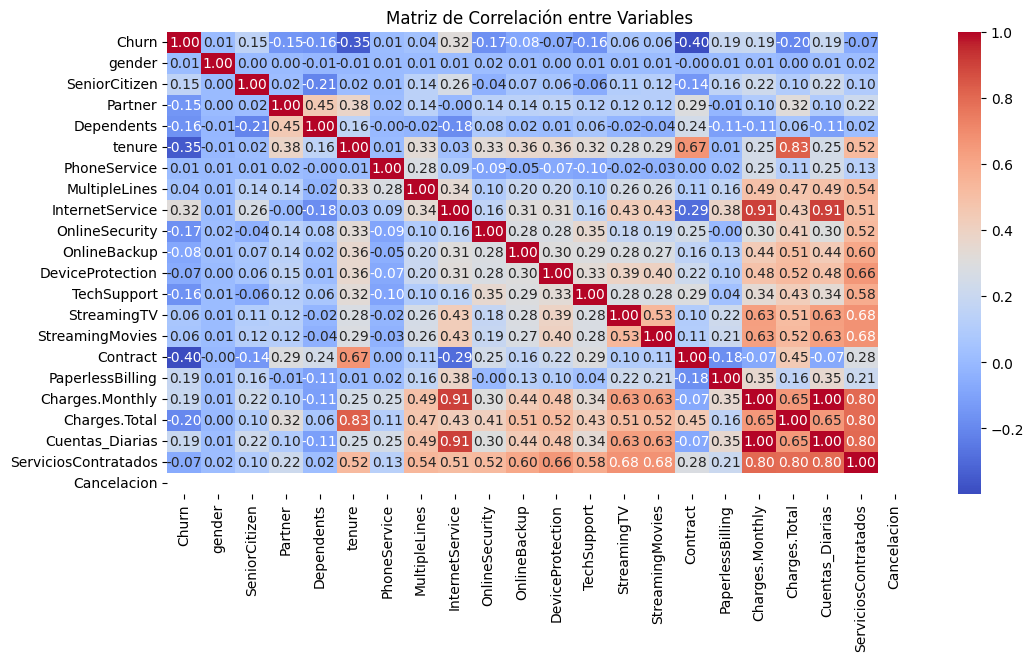

In [45]:
# Filtrar solo las columnas num√©ricas
datos_numericos = datos_limpios.select_dtypes(include=["number"])

# Calcular la matriz de correlaci√≥n
correlaciones = datos_numericos.corr()

# Visualizar con un mapa de calor
plt.figure(figsize=(12,6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlaci√≥n entre Variables")
plt.show()


In [49]:
print("Correlaci√≥n entre Cuentas_Diarias y EstadoCancelacion:")
print(datos_limpios.columns)

Correlaci√≥n entre Cuentas_Diarias y EstadoCancelacion:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias', 'PaymentMethod_bank transfer (automatic)',
       'PaymentMethod_credit card (automatic)',
       'PaymentMethod_electronic check', 'PaymentMethod_mailed check',
       'ServiciosContratados', 'Cancelacion', 'EstadoCancelacion'],
      dtype='object')


In [53]:
datos_limpios["EstadoCancelacion"] = datos_limpios["Churn"].map({0: "No Cancel√≥", 1: "Cancel√≥"})
datos_limpios["EstadoCancelacion"] = datos_limpios["EstadoCancelacion"].map({"No Cancel√≥": 0, "Cancel√≥": 1})
datos_numericos = datos_limpios.select_dtypes(include=["number"])
correlaciones = datos_numericos.corr()
print(datos_limpios[['Cuentas_Diarias', 'Cancelacion']].corr())
print(datos_limpios[['Cuentas_Diarias', 'EstadoCancelacion']].corr())

                 Cuentas_Diarias  Cancelacion
Cuentas_Diarias              1.0          NaN
Cancelacion                  NaN          NaN
                   Cuentas_Diarias  EstadoCancelacion
Cuentas_Diarias           1.000000           0.193356
EstadoCancelacion         0.193356           1.000000


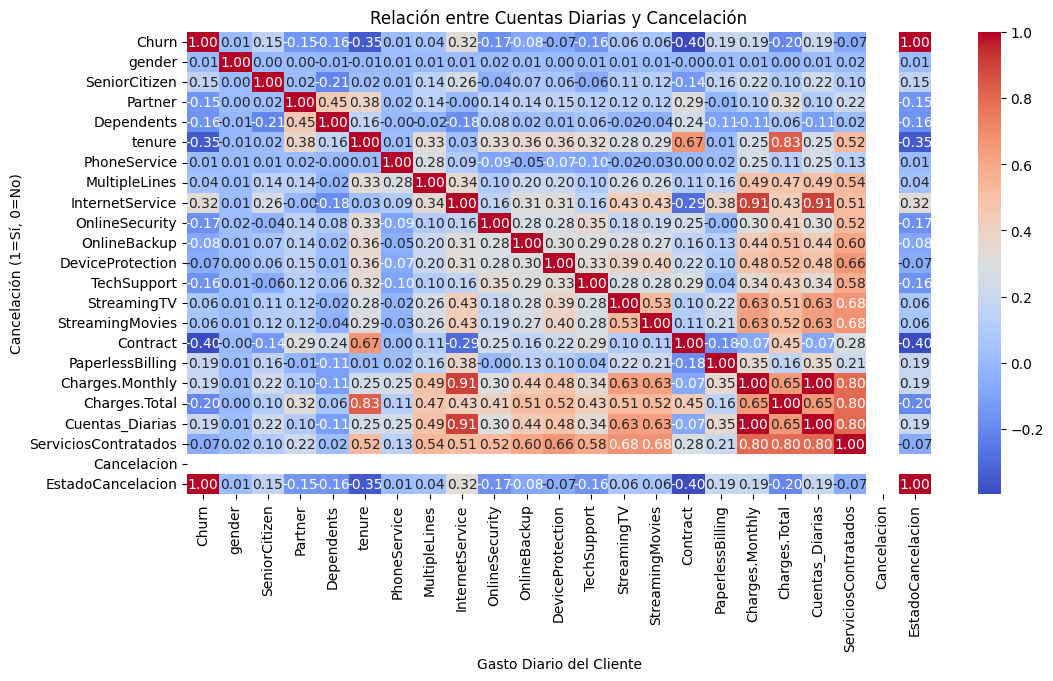

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Relaci√≥n entre Cuentas Diarias y Cancelaci√≥n")
plt.xlabel("Gasto Diario del Cliente")
plt.ylabel("Cancelaci√≥n (1=S√≠, 0=No)")
plt.show()